# **Credit Risk Modeling**

## **Table of Contents**

* [1. Introduction](#1)
* [2. Importing Libraries](#2)
* [3. Data Preparation](#3)
* [4. Dealing with potential Outliers](#4)
* [5. Encoding Variables](#5)
* [6. Machine Learning Pipeline](#6)
* [7. Performance Metrics](#7)
* [8. Undersample Approach](#8)
* [9. Oversample Approach](#9)

## **Introduction**

<a id="1"></a>

Credit risk scoring methods are widely used for evaluating potential loan applications in both financial and banking institutions. These procedures allow banks to describe the likelihood of a default over a particular time horizon. 

Financial institutions deploy models that consider the credit history of the borrowers and the inputs from their own economic stress scenarios to measure credit risk. Keen awareness is needed to identify, measure, monitor and control credit risk, guarantee sufficient capital against these risks and adequate compensation for the risks incurred.

When an institution receives a loan application, a decision regarding the approval of the loan has to be made considering the applicant’s profile. There are two types of risks assoiciated with this decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to an instituiton;

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial.

The data for this specific scenario is provided by LendingClub, a P2P lending company that provides loans without the need of any financial intermdediation and/or collateral. Investors are responsible for their own decision on lending. Even though the company has fitter borrowers who meet the minimum requirements, there is still a huge risk of non-repayment. This is the problem that this project works on by making the prediction of loan status for these applicants.

The data contains information about past loan applicants and whether they ‘defaulted’ or not. 

The aim is to identify patterns, which may serve as key information to either deny a loan to an applicant, reduce the amount of loan or even lending at higher interest rate.

### **Main tasks of this research:**

- Make a preliminary statistical analysis of the credit dataset

- Develop a several models to predict the probability of default evaluating them using different performance metrics

- Utilize model combination (Stacking Generalization Approach) and compare it to the more traditional credit scoring methods

**This notebook covers feature engeneering and modeling a decision tree classifier**

## **Importing Libraries**

<a id="2"></a>

---

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import  Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline
import warnings

**Additional configuration features for easier vizualization**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 0)
pd.options.mode.chained_assignment = None 
warnings.simplefilter(action="ignore", category=FutureWarning)

**Checking Working Directory**

In [3]:
os.getcwd() ### Check Working Directory

'C:\\Users\\raimu\\OneDrive - NOVAIMS\\Tese\\4. Tese\\Data\\Python File\\Dissertation Code'

**Importing Data**

In [4]:
df_train = pd.read_csv('1. dataset_for_feature_engeneering.csv')

In [5]:
df_train.drop(['Unnamed: 0'],1, inplace=True)

In [6]:
df_train.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,fico_score
0,3600.0,36,13.99,C,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,PA,5.91,0.0,1.0,7.0,0.0,2765.0,29.7,13.0,122.67,Individual,1.0,0.0,562.0
1,24700.0,36,11.99,C,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,SD,16.06,1.0,4.0,22.0,0.0,21470.0,19.2,38.0,926.35,Individual,4.0,0.0,697.0
2,20000.0,60,10.78,B,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,IL,10.78,0.0,0.0,6.0,0.0,7869.0,56.2,18.0,15813.30,Joint App,5.0,0.0,702.0
3,10400.0,60,22.45,F,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,PA,25.37,1.0,3.0,12.0,0.0,21929.0,64.5,35.0,10128.96,Individual,6.0,0.0,702.0
4,11950.0,36,13.44,C,RENT,34000.0,Source Verified,Fully Paid,debt_consolidation,GA,10.20,0.0,0.0,5.0,0.0,8822.0,68.4,6.0,7653.56,Individual,0.0,0.0,757.0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345310 entries, 0 to 1345309
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  int64  
 2   int_rate              1345310 non-null  float64
 3   grade                 1345310 non-null  object 
 4   home_ownership        1345310 non-null  object 
 5   annual_inc            1345310 non-null  float64
 6   verification_status   1345310 non-null  object 
 7   loan_status           1345310 non-null  object 
 8   purpose               1345310 non-null  object 
 9   addr_state            1345310 non-null  object 
 10  dti                   1344936 non-null  float64
 11  delinq_2yrs           1345310 non-null  float64
 12  inq_last_6mths        1345309 non-null  float64
 13  open_acc              1345310 non-null  float64
 14  pub_rec               1345310 non-

In [8]:
df_train.shape

(1345310, 23)

### **Data Preparation**


<a id="3"></a>

---

Now that we chose the potential variables for the modelling phase some more data preparation is required.

First check which variables have missing data:

In [9]:
def missing_data(df_train):
    total = df_train.isnull().sum()
    percent = (df_train.isnull().sum()/df_train.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df_train.columns:
        dtype = str(df_train[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

missing_data(df_train)

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,fico_score
Total,0,0,0,0,0,0,0,0,0,0,374,0,1,0,0,0,857,0,0,0,47281,697,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0278,0.0,0.000074,0.0,0.0,0.0,0.063703,0.0,0.0,0.0,3.514506,0.05181,0.0
Types,float64,int64,float64,object,object,float64,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64


**We still have some missing values but these represent less than 10% of the total data. These values will be median imputed.** 

**This step will be executed when we build the machine learning pipeline later on.**

### **Dealing with potential Outliers**


<a id="4"></a>

---

Outliers are values that fall of outside of the overall patern of a data set.

To deal with these outliers we decided to use the interquantile rule by:

- Calculate the Interquantile range (IQR) for the data

- Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).

- Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
 
- Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

Outlier Removal Tradeoff:

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. 

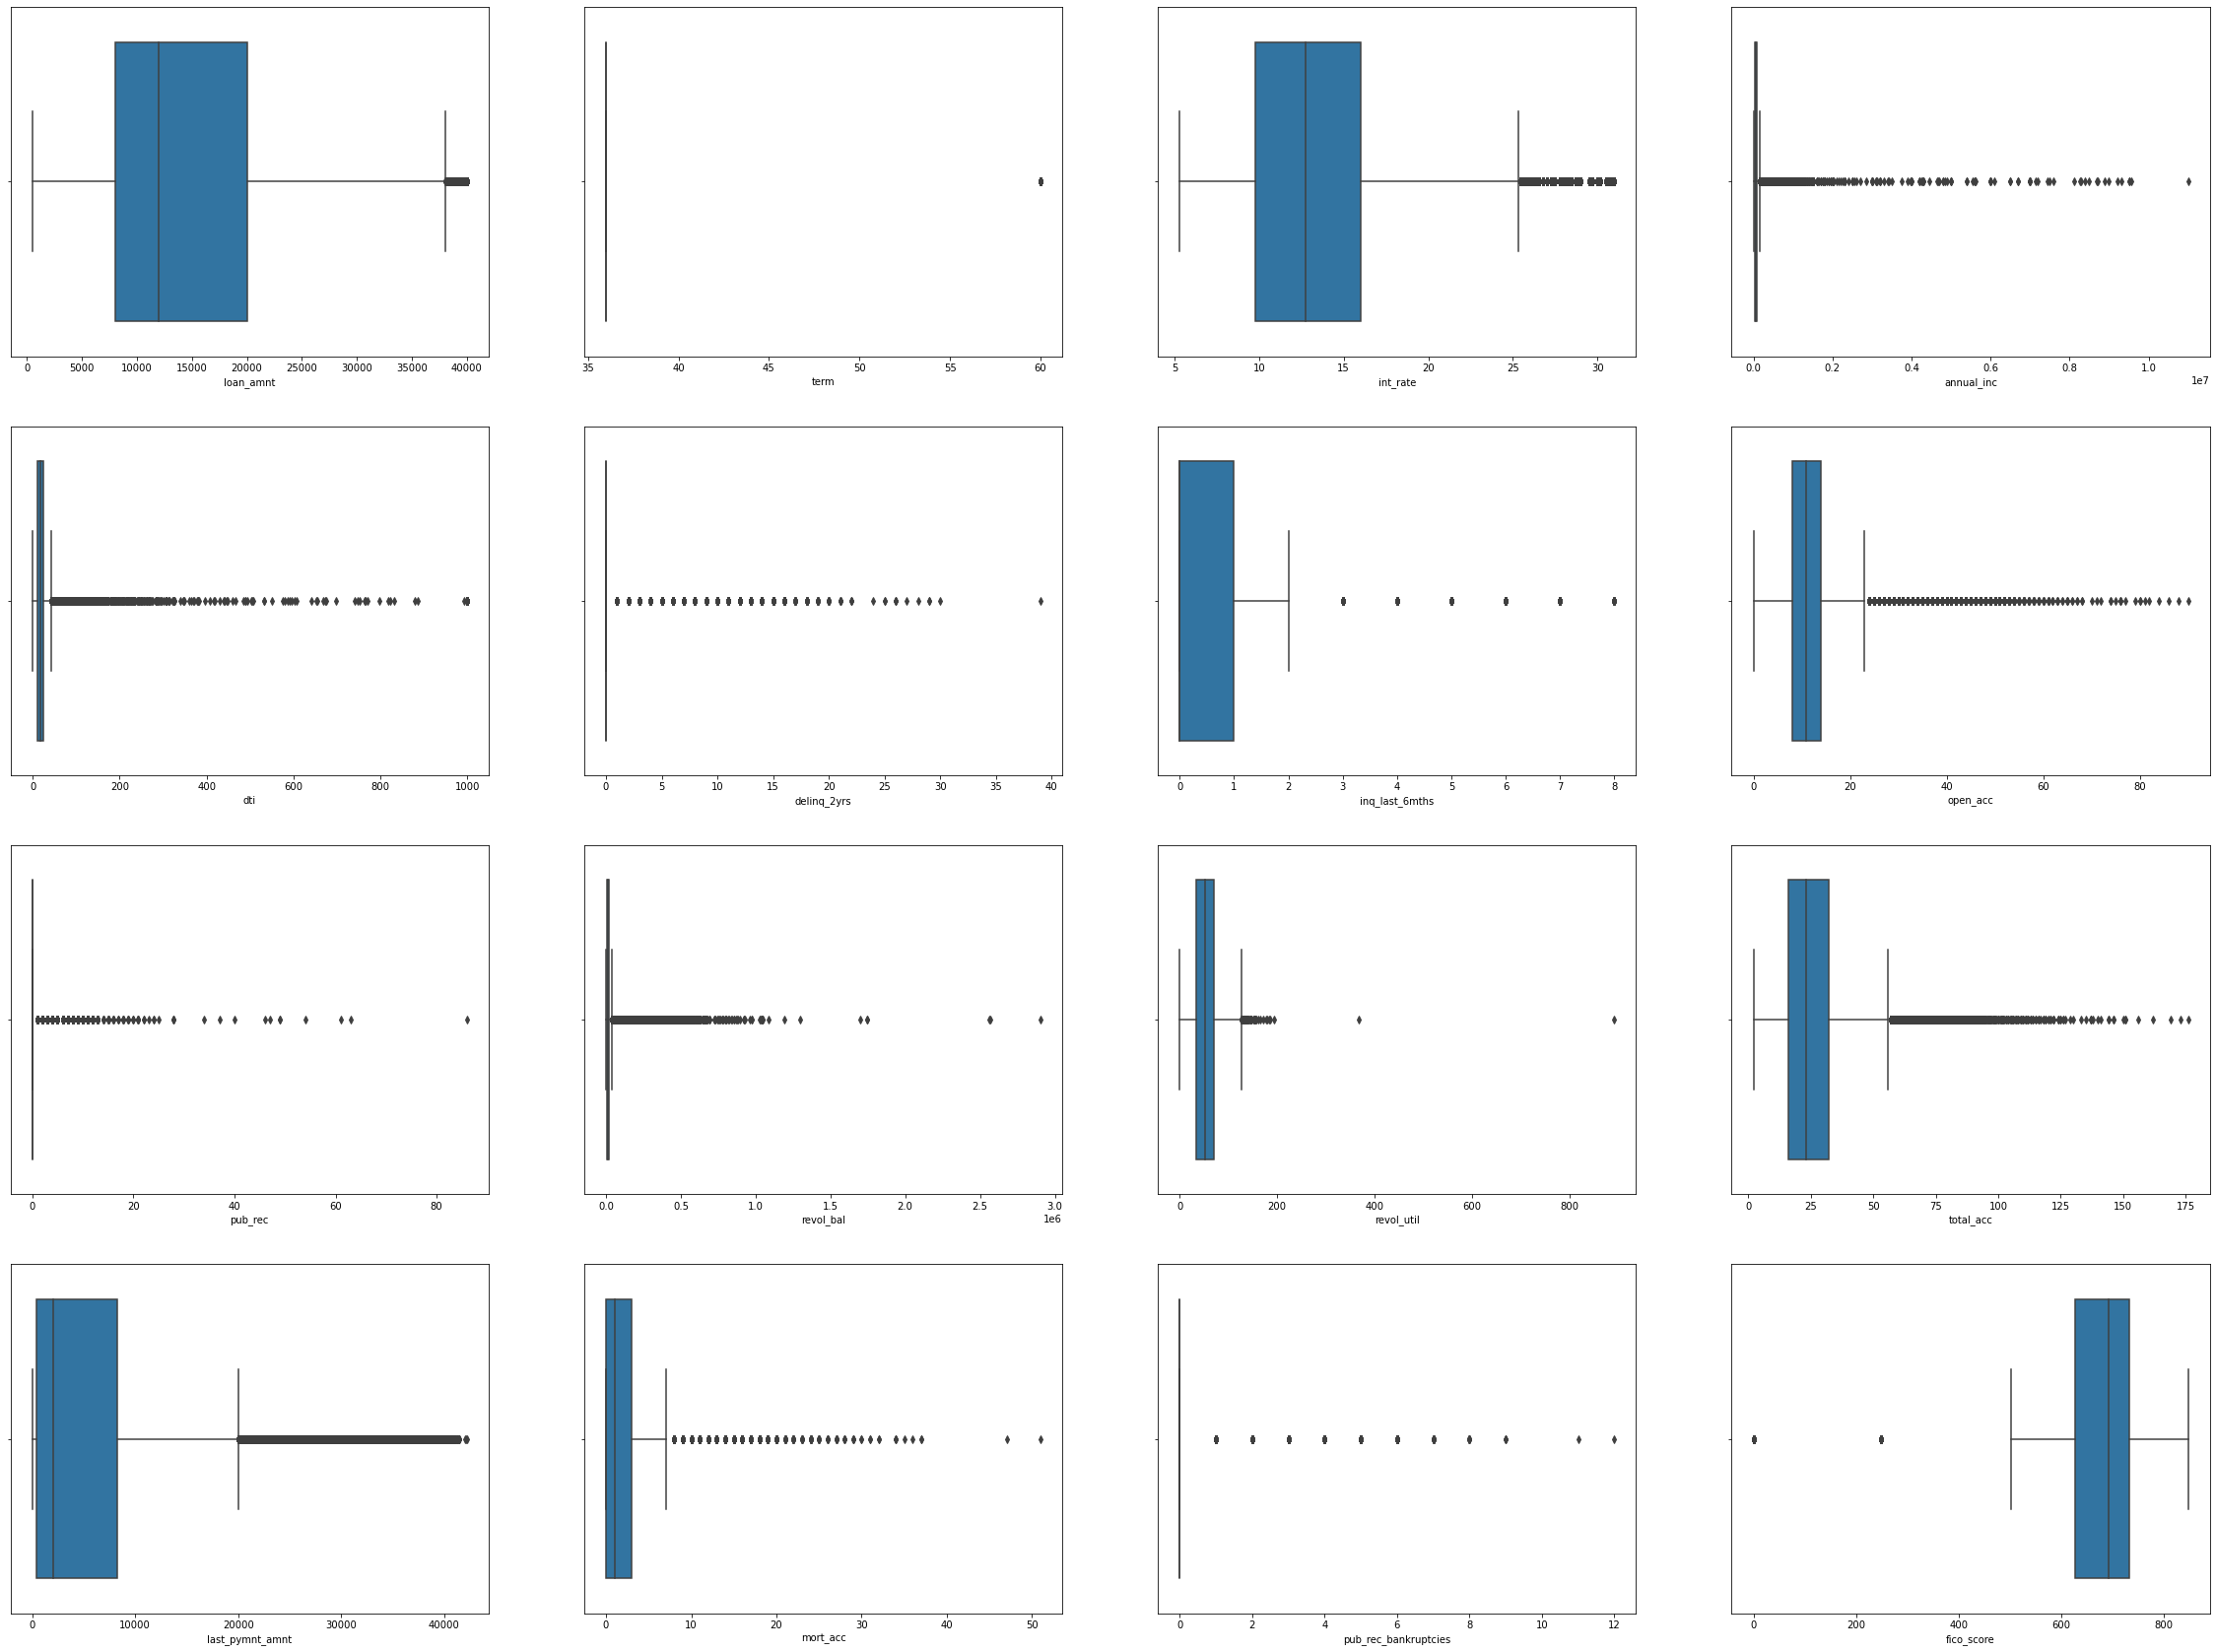

In [10]:
numerical = df_train.select_dtypes(include=[np.number]).columns.tolist()

fig, ax = plt.subplots(4, 4, figsize=(40, 30))

for var, subplot in zip(df_train[numerical], ax.flatten()):
    
    sns.boxplot(df_train[var], ax=subplot)

Outliers are unusual values in a datset, and they can distort statistical analyses and violate their assumptions. 

Analysts / Data Scientits need to confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. We should only remove an outlier if we are able to justify its exclusion. 

As mentioned in the first notebook both annual income and dti are variables that present rather extreme outliers. The removal of these outliers goes as follows:

- Annual income: Values above 1000000 were dropped
- Dti: Values above 60 were dropped
- Revol_Bal: Values above 1000000 were dropped
- Fico_score: Values bellow 249.5 were dropped

In [11]:
df_train1 = df_train[df_train['annual_inc'] > 1000000]

In [12]:
df_train1.shape

(290, 23)

In [13]:
df_train1.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,application_type,mort_acc,pub_rec_bankruptcies,fico_score
6219,16000.0,36,5.32,A,RENT,1400000.0,Source Verified,Fully Paid,debt_consolidation,IL,0.07,0.0,0.0,10.0,0.0,3141.0,6.5,22.0,5027.63,Individual,2.0,0.0,802.0
6460,1225.0,36,11.99,C,RENT,3964280.0,Source Verified,Fully Paid,other,NY,0.05,0.0,0.0,5.0,0.0,1208.0,6.7,8.0,1131.00,Individual,0.0,0.0,687.0
9270,35000.0,36,11.22,B,MORTGAGE,2300000.0,Verified,Fully Paid,home_improvement,IL,2.39,0.0,0.0,8.0,0.0,41510.0,97.4,39.0,34725.96,Individual,4.0,0.0,712.0
16977,8000.0,36,7.89,A,MORTGAGE,1248000.0,Source Verified,Fully Paid,home_improvement,CA,1.30,1.0,1.0,17.0,1.0,6305.0,29.3,32.0,6247.85,Individual,3.0,0.0,597.0
19486,35000.0,36,13.67,C,MORTGAGE,2500000.0,Source Verified,Fully Paid,debt_consolidation,AZ,1.31,0.0,1.0,12.0,0.0,208165.0,44.6,32.0,1190.40,Individual,4.0,0.0,747.0


In [14]:
df_train2 = df_train1[df_train1['dti'] > 60]

In [15]:
df_train2.shape

(0, 23)

In [16]:
df_train4 = df_train[df_train['revol_bal'] > 1000000]

In [17]:
df_train4.shape

(15, 23)

In [18]:
df_train5 = df_train1[df_train1['fico_score'] <= 0]

In [19]:
df_train5.shape

(0, 23)

In [20]:
df_train1 = df_train[df_train['annual_inc'] <= 1000000]

df_train2 = df_train1[df_train1['dti'] <= 60]

df_train3 = df_train2[df_train2['revol_bal'] <= 1000000]

df_train4 = df_train3[df_train3['fico_score'] > 0]

df_train5 = df_train4[df_train4['dti'] > -1]

In [21]:
df_train5 = df_train

### **Encoding Variables**


<a id="5"></a>

---

**Encoding the target variable**

Many of our model variables are categorical and these need to be properly encoded for modeling.

In [22]:
df_train['loans'] = df_train['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

df_train.drop(['loan_status'],1, inplace=True)

In [23]:
df_train1 = df_train.corrwith(df_train['loans'])

df_train1

loan_amnt               0.065604
term                    0.176096
int_rate                0.258792
annual_inc             -0.041759
dti                     0.084510
delinq_2yrs             0.019381
inq_last_6mths          0.065454
open_acc                0.028078
pub_rec                 0.026194
revol_bal              -0.020010
revol_util              0.060048
total_acc              -0.011300
last_pymnt_amnt        -0.347385
mort_acc               -0.075294
pub_rec_bankruptcies    0.025308
fico_score             -0.636838
loans                   1.000000
dtype: float64

In [24]:
# Create a modeling dataset from the original dataset

X = df_train.copy(deep=True)

In [25]:
# Create the Target Variable

y = X['loans']

------

**Splitting the data into a train and test set**

For this research, the data was splitted in 80% for training and 20% for testing

In [26]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [27]:
# Remove the Target from the training

X_train = X_train.drop(['loans'],1)

X_test = X_test.drop(['loans'],1)

### **Building a Machine Learning Pipeline**


<a id="6"></a>

**Modeling Logistic Regression using Stochastic Gradient Descent**

---

A machine learning pipeline is a way to automate the workflow enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated.

For this particular notebook we are going to focus on modeling **Decision Tree**

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. 

The Pipeline that we are going to build is going to do the following steps:

1) Deal with missing values: All missing values were median imputed;

2) Encode categorical varaibles using Ordinal Encoding and One hot Encoding. Bello we present our reasoning:

There are two types of categorical varables in our dataset:

- **Ordinal variables:** The levels of the variable follow a specific order - Grade variable we know that: **A>B>C>D>E>F>G**. To deal with this we map each grade feature with an interger respecting said ordering;

- **Categorical variables**: The levels of the variables do not follow a specific order. Mapping these levels will introduce an order which in this case it is not desirable. We stored these variables in a list and then we use the OneHotEncoder library

3) Standardize features by removing the mean and scaling to unit variance using StandardScaler (Not required for Decision Tree)

4) PCA: Due to the large size of the dataset we performed Principal Componenet Analysis as it helps to deal with multicolienarity

**Categorical Columns**

In [28]:
categorical_variables = list(X_train.select_dtypes('object').columns)

print(f"Categorical columns are: {categorical_variables}")

Categorical columns are: ['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'application_type']


**Numerical Columns**

In [29]:
numerical_variables = list(X_train.select_dtypes('number').columns)

print(f"Numerical columns are: {numerical_variables}")

Numerical columns are: ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt', 'mort_acc', 'pub_rec_bankruptcies', 'fico_score']


We are going to make two list for categorical varaibles making implementi pipelines easier

In [30]:
one_hot_encoding_variables = ['home_ownership', 'purpose', 'addr_state', "verification_status", "application_type"]

ordinal_encoding_variables = ["grade"]

- Numerical Pipeline

In [31]:
scaler = StandardScaler()

numeric_col_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='median')),
])

- Ordinal Pipeline

In [32]:
ordinal_col_transformer = Pipeline(steps=[
    ('ordinalencoder', OrdinalEncoder()),
])

- One Hot Encoding Pipeline

In [33]:
one_hot_col_transformer = Pipeline(steps=[
   ('onehotencoder', OneHotEncoder(sparse=False, handle_unknown = "ignore")),
])

**Putting it all together**

In [34]:
preprocessing_pipeline = ColumnTransformer(transformers=[
    ("numerical",numeric_col_transformer, numerical_variables),
    ("categorical_ordinal", ordinal_col_transformer, ordinal_encoding_variables),
    ("categorical_onehot", one_hot_col_transformer, one_hot_encoding_variables),
])

In [35]:
model =  DecisionTreeClassifier(random_state=42, class_weight = "balanced")

scaler = StandardScaler()

pca = PCA(n_components = 5)

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ("pca", pca),
    ("model", model)
])

pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['loan_amnt', 'term',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'last_pymnt_amnt',
                                                   'mort_acc',
                                                   'pub_rec_bankruptcies',
                                                   'fico_s

In [36]:
set_config(display="diagram")

pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['loan_amnt', 'term',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'last_pymnt_amnt',
                                                   'mort_acc',
                                                   'pub_rec_bankruptcies',
                                                   'fico_score']),
                                                 ('ca...
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['grade']),
                                                 ('categorical_onehot',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['home_ownership', 'purpose',
                                                   'addr_state',
                                                   'verification_status',
                                                   'application_type'])])),
                ('pca', PCA(n_components=5)),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [37]:
scoring = ['accuracy', 'precision', "recall", "f1"]

scores = cross_validate(pipeline_dt, X_train, y_train, scoring=scoring, return_train_score = True)

In [38]:
scores

{'fit_time': array([24.35476112, 23.84798384, 23.1990664 , 24.51400328, 24.27463388]),
 'score_time': array([0.86970949, 0.82159662, 0.81109667, 0.80912995, 0.83447051]),
 'test_accuracy': array([0.91328223, 0.91377468, 0.91329617, 0.91330506, 0.91363026]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.78652268, 0.79000143, 0.78696576, 0.78675915, 0.78759851]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.77630905, 0.77374913, 0.77562894, 0.77604785, 0.77683912]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.78138249, 0.78179082, 0.78125623, 0.78136679, 0.78218181]),
 'train_f1': array([1., 1., 1., 1., 1.])}

In [39]:
scores["train_accuracy"].mean()

1.0

In [40]:
scores["test_accuracy"].mean()

0.9134576789178321

In [41]:
scores["train_precision"].mean()

1.0

In [42]:
scores["test_precision"].mean()

0.7875695065243964

In [43]:
scores["train_recall"].mean()

1.0

In [44]:
scores["test_recall"].mean()

0.7757148173884423

In [45]:
scores["train_f1"].mean()

1.0

In [46]:
scores["test_f1"].mean()

0.7815956295774755

In [47]:
print("The AUC Score for the train (before tunning) is:", roc_auc_score(y_train, pipeline_dt.predict_proba(X_train)[:,1]))

The AUC Score for the train (before tunning) is: 1.0


In [48]:
print("The AUC Score for the test (before tunning) is:", roc_auc_score(y_test, pipeline_dt.predict_proba(X_test)[:,1]))

The AUC Score for the test (before tunning) is: 0.8642350436235211


**Applying Stratified K Fold Cross Validation**

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. When a specific value for k is chosen, it may be used in place of k in the reference to the model.

The general procedure of k fold cross validation goes as follows:

- Shuffle the dataset randomly.
- Pick a number of folds. For this research we considered K = 5 folds where 1 fold will be the test set and the remaining k-1 the training set
- Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
- Validate the results on the test set by taking the average score

There are many types of cross-validation procedures but for this scenatio we are going to use Stratified K Fold Cross Validation  which is an extension of the cross-validation technique used for classification problems. 

It maintains the same class ratio throughout the K folds as the ratio in the original dataset. Ideal for imbalanced data

In [49]:
KF = StratifiedKFold(n_splits = 5)

### **Hyperparameter Tunning using GridSearchCV**

When designing a machine learning model, we will be presented with different choices as to how to define your model architecture. 

Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. 

Parameters which define the model architecture are referred to as hyperparameters and thus this process of searching for the ideal model architecture is referred to as hyperparameter tuning.

This process usually goes as follows:
- Define a model
- Define the range of possible values for all hyperparameters (parameter grid)
- Define a method for sampling hyperparameter values
- Define an evaluative criteria to evaluate the model
- Define a cross-validation method

In [50]:
param_grid_dt = {}
    
param_grid_dt['model__min_samples_split'] = [20, 30, 50, 100]
param_grid_dt['model__criterion'] = ['gini', 'entropy']
param_grid_dt['model__max_depth'] = [3,5,10,15,20]

Applying GridSearchCV

In [51]:
grid_sgdlogreg = GridSearchCV(pipeline_dt, param_grid_dt,
                              scoring = 'f1', pre_dispatch = 3,
                              n_jobs = -1, cv = KF, verbose = 10, return_train_score = True)

search = grid_sgdlogreg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [52]:
pd.concat([pd.DataFrame(search.cv_results_["params"]),pd.DataFrame(search.cv_results_["mean_test_score"], columns=["f1"])],axis=1)

,model__criterion,model__max_depth,model__min_samples_split,f1
0,gini,3,20,0.768263
1,gini,3,30,0.768263
2,gini,3,50,0.768263
3,gini,3,100,0.768263
4,gini,5,20,0.807707
5,gini,5,30,0.807707
6,gini,5,50,0.807707
7,gini,5,100,0.807707
8,gini,10,20,0.832476
9,gini,10,30,0.832491


Best score

In [53]:
search.best_score_

0.8327740620296982

Best Parameters

In [54]:
search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 15,
 'model__min_samples_split': 100}

Best Estimator and Fitting the model considering the results from GridSearchCV

In [55]:
clf = search.best_estimator_

# fitting the model for grid search 

clf.fit

<bound method Pipeline.fit of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['loan_amnt', 'term',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'last_pymnt_amnt',
                                                   'mort_acc',
                                                   'pub_rec_bankruptcies',
                            

**Predictions on both the training and test set**

In [56]:
grid_predictions_train = clf.predict(X_train)

grid_predictions_test =  clf.predict(X_test)

### **Performance Metrics**


<a id="7"></a>

---

Performance metrics are a part of every machine learning problem. Wether we are dealing with a classification or regression problem performance metrics are used to monitor and measure the performance of a model during training and testing. Since we are dealing with a classification problem the following performance metrics will be used:

- **Confusion Matrix:** Table layout which allows the visualization of the performance of an algorithm. A confusion matrix gives us four important measures:

    - True Positives (TP) – Default situations that are correctly classified as default.
    - True Negatives (TN) – Non-default situations that are correctly classified as non-default.
    - False Positives (FP) - Non-default applicants, but the model classified / predicted them as default. In statistics this is known as a Type I error. (a))
    - False Negatives (FN) – Default applicants, but the model classified / prediced them as non-default. In statistics this is known as a Type II error. (b))
    
    
a)  Type I Error (False Positive, FP): When the model predicts as defaulter but not defaulted (Affects profitability)

b)  Type II Error (False Negative, FN): Model predicts customer as not defaulter but defaulted (affects losses and provisions)

False Positive errors affects profitability of the lender (we predicted as defaulters but was a good customer) whereas the False Negative cases affects the risk side of the business (affecting losses and provisions) as we estimated the applicant as good when actually defaulted).

- **Accuracy:** Accuracy simply refers to the number of correct predicitions divided by the total number of predictions.It is given by:

$$ Accuracy =  \frac{TP+TN}{TP+TN+FP+FN}$$

- **Precision Score**: Precision measures how accurately the model can capture default i.e out of the total predicted default cases, how many turned out to be default. 

$$ Precision =  \frac{TP}{TP+FP}$$

- **Recall/Sensitivity Score:** Recall or Sensitivity measures out of all the actual default cases; how many the model could predict correctly as default. 

     - It is known as the **True Positive Rate**

$$ Recall =  \frac{TP}{TP+FN}$$

- **Specificity:** It measures the proportion of correctly identified Non Defaults over the total of Non Default prediction made by the model.

    -  Also known as **True Negative Rate**


$$ Specificity =  \frac{TN}{TN+FP}$$

- **F1 Score:** : F1 Score represents a balance between precision and recall. Mathematically:

$$ F1  Score = 2 * \frac {(precision * recall)}{(precision + recall)}$$

- **ROC Curve and AUC Score:** ROC is a probability curve and AUC represent the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

A critical and somewhat overlooked part of classification is deciding whether to prioritize precision or recall. This is more of a business question than a data science one and requires that we have a clear idea of our objective as well as how the costs of false positives compare to those of false negatives.

**Defining a funtion for the performance metrics**

In [57]:
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
    
  measures_list = ['ACCURACY','PRECISION', 'RECALL', "F1 SCORE"]

  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain)]
    
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
                metricsObj.precision_score(yTest, yPredTest),
                metricsObj.recall_score(yTest, yPredTest),
                metricsObj.f1_score(yTest, yPredTest)]

  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
    
  return(resultsDF)

**Defining a funtion for the confusion matrix**

In [58]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
 

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

**Plot Confusion Matrix**

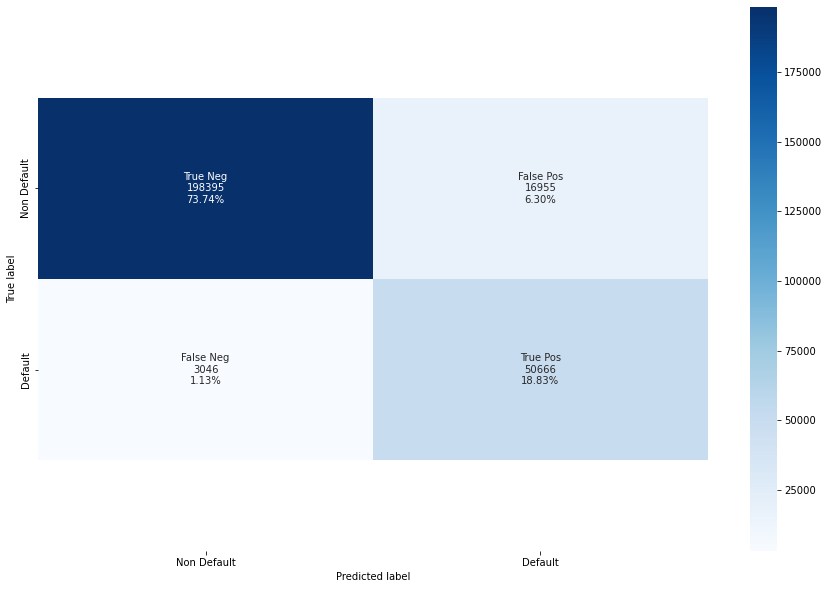

In [59]:
cf = metrics.confusion_matrix(y_test, grid_predictions_test)

labels = ['True Neg','False Pos','False Neg','True Pos']

categories = ['Non Default', 'Default']

make_confusion_matrix(cf, group_names=labels,categories=categories, cmap='Blues', figsize = (15,10))

**Dataframe with results for the Positive Class (Predict Default)**

This Dataframe compiles the information of the positive class for the train and test set using the results of both classification reports

In [60]:
resultsDF = performanceMetricsDF(metrics, y_train, grid_predictions_train, y_test, grid_predictions_test)

resultsDF

,Measure,Train,Test
0,ACCURACY,0.930271,0.925664
1,PRECISION,0.758704,0.749264
2,RECALL,0.954158,0.943290
3,F1 SCORE,0.845279,0.835156


By taking a look at the confusion matrix of the Decision Tree, the model performed rather well in the accuracy metric achieving a score of 72%. 

**Why did this happen?**

We need to take into consideration that the dataset being used is severly imbalanced and thus accuracy should serve as a complement of the performance metrics and not used alone. Accuracy simply refers to the proportion of correctly classified instances. It is usually the first metric you look at when evaluating a model. Since we are dealing with imbalanced data accuracy can be misleading, a model can predict the value of the dominant class for all predictions and achieve a high accuracy score. This is known as the accuracy paradox

Since we are dealing with a very imbalanced dataset both recall and precision will be our true metrics to evaluate the model

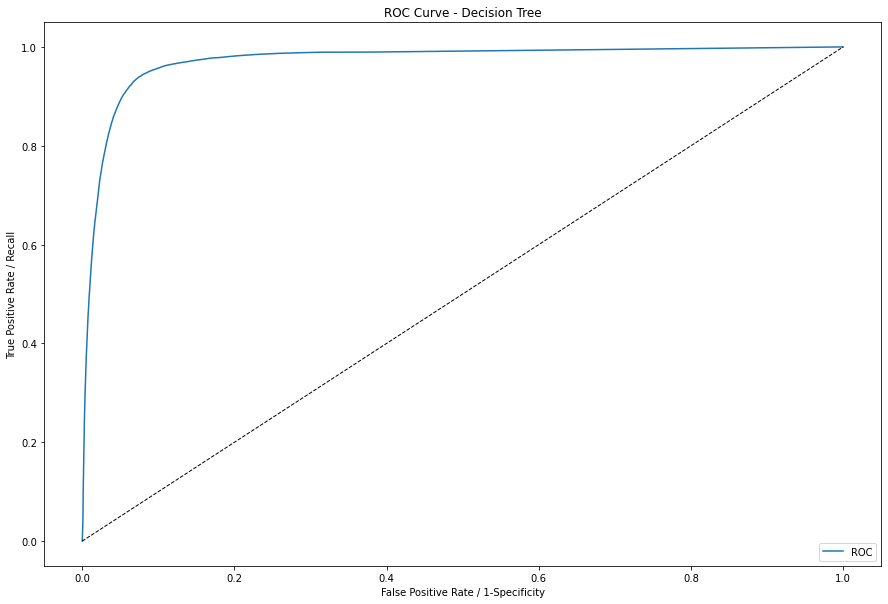

The AUC Score for the train is: 0.981530388920816
The AUC Score for the test is: 0.9722395005214544


In [61]:
plt.figure(figsize=(15, 10))

probs = clf.predict_proba(X_test)

FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])

plt.plot(FP,TP,label="ROC")

plt.plot([0, 1], [0, 1], '--k', lw=1)

plt.title("ROC Curve - Decision Tree")

plt.xlabel("False Positive Rate / 1-Specificity")

plt.ylabel("True Positive Rate / Recall")

plt.legend(loc = "lower right")

plt.show()

print("The AUC Score for the train is:", roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))

print("The AUC Score for the test is:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

**Learning Curve**

Based on: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

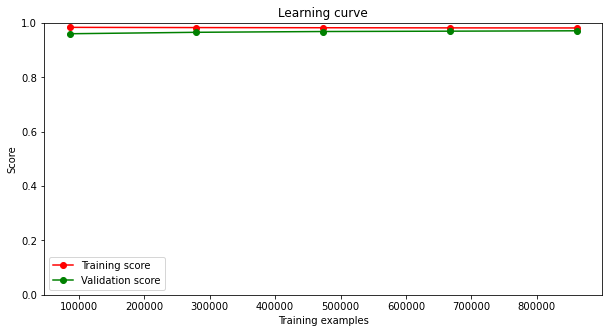

In [62]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure(figsize=(10, 5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    array = np.linspace(1, int(X.shape[0]*0.8))
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = "roc_auc")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color='red',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green',
             label='Validation score')

    plt.legend(loc = 'best')
    return plt


g = plot_learning_curve(clf, "Learning curve", X_train, y_train, cv=KF,ylim=(0, 1), n_jobs = -1,
                  train_sizes=np.linspace(0.1, 1.0, 5))

-----END ------

--------------------

### **Balancing the Dataset**

Lets look at our dataset and find the amount of each class

In [63]:
default_cases = np.array(df_train[df_train.loans == 1].index)

len(default_cases)

268559

In [64]:
non_default_cases = np.array(df_train[df_train.loans == 0].index)

len(non_default_cases)

1076751

Imbalanced datasets are common problems in most classsification problems. Bellow we present some techniques used to deal with this issue:

**1) Collect more data:**

More information allow us to have a more complete and balanced perspective of our dataset

**2) Changing the performance metrics**

Accuracy is not the metric to use when working with an imbalanced dataset. We have seen that it is misleading.

There are metrics that have been designed to tell you a more compelte story when working with imbalanced classes. These metrics, that were presented earlier, include: 

 - Precision: A measure of a classifiers exactness

 - Recall: A measure of a classifiers completeness 

 - F1 Score: A weighted average of precision and recall


**3) Using resampling techniques**


The dataset can be changed to have more balanced data. This is known as sampling your dataset and there are two main methods that you can use to even-up the classes:

   - Add copies of instances from the under-represented class called over-sampling

   - Delete instances from the over-represented class, this is known as under-sampling.


  
Other techniques include;

**4) Generate Synthetic Samples**

A technique similar to sampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.


**5) Cost Sensitive Learning**

A subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. It is a field of study that is closely related to the field of imbalanced learning that is concerned with classification on datasets with a skewed class distribution.

---

### **Undersample Approach**


<a id="8"></a>

Using undersampling we randomly selected the same amount of non-default cases as the default ones and created a new dataset. With the down-sized data, we then proceed to re-train the model.

Using oversample we randomly selected the same amount of default cases as the non-default ones and created a new dataset. With the down-sized data, we then proceed to re-train the model.

When using the k-fold cross-validation is to directly split the data into 5 folds. 

In general,  k-fold cross-validation performance evaluation method relies on the assumption that - each fold data is a representative sample of the main data and reflects the class distribution of the target feature in the main data.

However, applying this rule to an imbalanced classification problem poses a distribution problem that might result in a biased estimate or overfitting in favor of the majority class. The correct use of the k-fold cross-validation in an imbalanced class distribution problem, requires:

   - That each k-fold data is stratified to capture the imbalanced class distribution of the target feature in the main data. This can be achieved using the stratified k-fold cross-validation;
   
   - That, at each cross-validation evaluation, only the training set is oversampled (using synthetic minority oversampling technique or other class balancing techniques). This can be achieved using a machine learning pipeline. Setting a pipeline helps prevents data leakage;
   
   - That, at each cross-validation evaluation, the test data is not oversampled i.e it is unaffected by the oversampling, though it maintains the imbalanced class distribution of the target feature as in the main data;
   
   - That the oversampling is never done on the main data but the training data set, during each k-fold cross-validation evaluation.

Counter({0: 861401, 1: 214847})


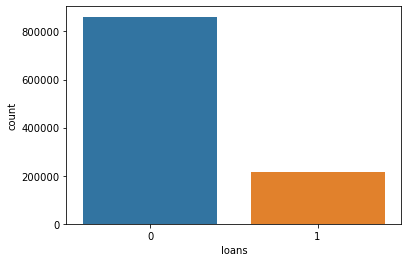

In [65]:
print(collections.Counter(y_train))

sns.countplot(x = "loans", data=pd.DataFrame(data={'loans':y_train}))

plt.show()

Counter({0: 429694, 1: 429694})


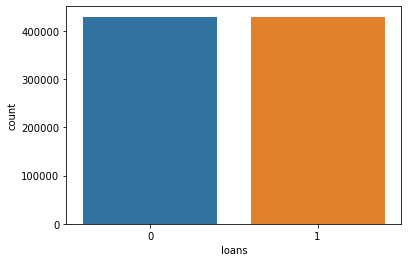

In [66]:
under = RandomUnderSampler(sampling_strategy=0.5, random_state = 42)

over = RandomOverSampler(sampling_strategy="minority", random_state = 42)

X_train_rus, y_train_rus = under.fit_resample(X_train, y_train)

X_train_final, y_train_final = over.fit_resample(X_train_rus, y_train_rus)

print(collections.Counter(y_train_final))

sns.countplot(x = "loans", data=pd.DataFrame(data={'loans':y_train_final}))

plt.show()

**Creating a pipeline**

In [72]:
model_rus =  DecisionTreeClassifier(random_state=42, class_weight = "balanced", criterion = "entropy", max_depth = 15, min_samples_split = 100)

pipeline_dt_rus = imb_pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ("under", under),
    ("over", over),
    ("pca", pca),
    ("model", model_rus)
])

pipeline_dt_rus.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['loan_amnt', 'term',
                                                   'int_rate', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'last_pymnt_amnt',
                                                   'mort_acc',
                                                   'pub_rec_bankruptcies',
                                                   'fico_score']),
                                                 ('ca...
                                                   'addr_state',
                                                   'verification_status',
                                                   'application_type'])])),
                ('under',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.5)),
                ('over',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('pca', PCA(n_components=5)),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=15,
                                        min_samples_split=100,
                                        random_state=42))])

In [73]:
grid_predictions_train_rus = pipeline_dt_rus.predict(X_train)

grid_predictions_test_rus =  pipeline_dt_rus.predict(X_test)

**Plot Confusion Matrix**

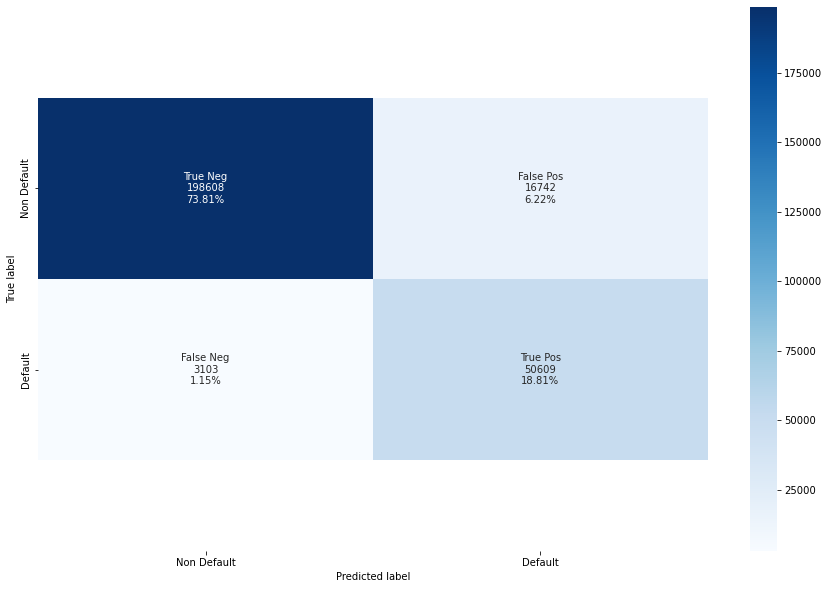

In [74]:
cf = metrics.confusion_matrix(y_test, grid_predictions_test_rus)

labels = ['True Neg','False Pos','False Neg','True Pos']

categories = ['Non Default', 'Default']

make_confusion_matrix(cf, group_names=labels,categories=categories, cmap='Blues', figsize = (15,10))

**Dataframe with results**

In [75]:
resultsDF = performanceMetricsDF(metrics, y_train, grid_predictions_train_rus, y_test, grid_predictions_test_rus)

resultsDF

,Measure,Train,Test
0,ACCURACY,0.930448,0.926244
1,PRECISION,0.760059,0.751422
2,RECALL,0.952180,0.942229
3,F1 SCORE,0.845341,0.836077


In [76]:
print("The AUC Score is:", roc_auc_score(y_test, pipeline_dt_rus.predict_proba(X_test)[:,1]))

The AUC Score is: 0.973196565068303


----